In [ ]:
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np 
import pandas as pd
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
#Packages related to general operating system & warnings
import os 
import warnings 
warnings.filterwarnings('ignore')
 # text customization
from termcolor import colored as cl
#Packages sklearn
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
#metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, roc_auc_score, recall_score, classification_report
#API
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
#models
from sklearn.linear_model import LogisticRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor, ExtraTreesClassifier 
from sklearn.naive_bayes import GaussianNB
#collection
from collections import Counter

<Figure size 432x216 with 0 Axes>

In [ ]:

#set kaggle API credentials 
os.environ['KAGGLE_USERNAME']='kawtaroukil'
os.environ['KAGGLE_KEY']='21bb4297b44a4a7c42bd20e8d3aeff94'


In [ ]:
#download the dataset 
! kaggle datasets download -d mlg-ulb/creditcardfraud

 77% 51.0M/66.0M [00:00<00:00, 100MB/s] 
100% 66.0M/66.0M [00:00<00:00, 95.7MB/s]


In [ ]:
#unzip file 
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
#Loading data
data=pd.read_csv('/content/creditcard.csv')
#Displaying the data
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#head de la base donnees
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#tail(n) return the last n rows
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#Describtion of data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Note: 
This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
#Somme des deux classes
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

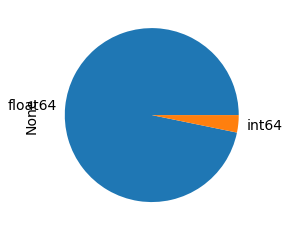

In [ ]:
#Continuous and discrete variables
data.dtypes.value_counts().plot.pie()

This plot schematizes the distribution of classes in our database,
in which the blue part presents the continuous quantitative data
(float) and orange represents qualitative data (the Class attribute).

# Data Cleaning

The purpose of this step is to remove null values, remove
duplicate transactions and normalize the Amount and Time variable.
First, we will test if there is a null value with the info() function:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

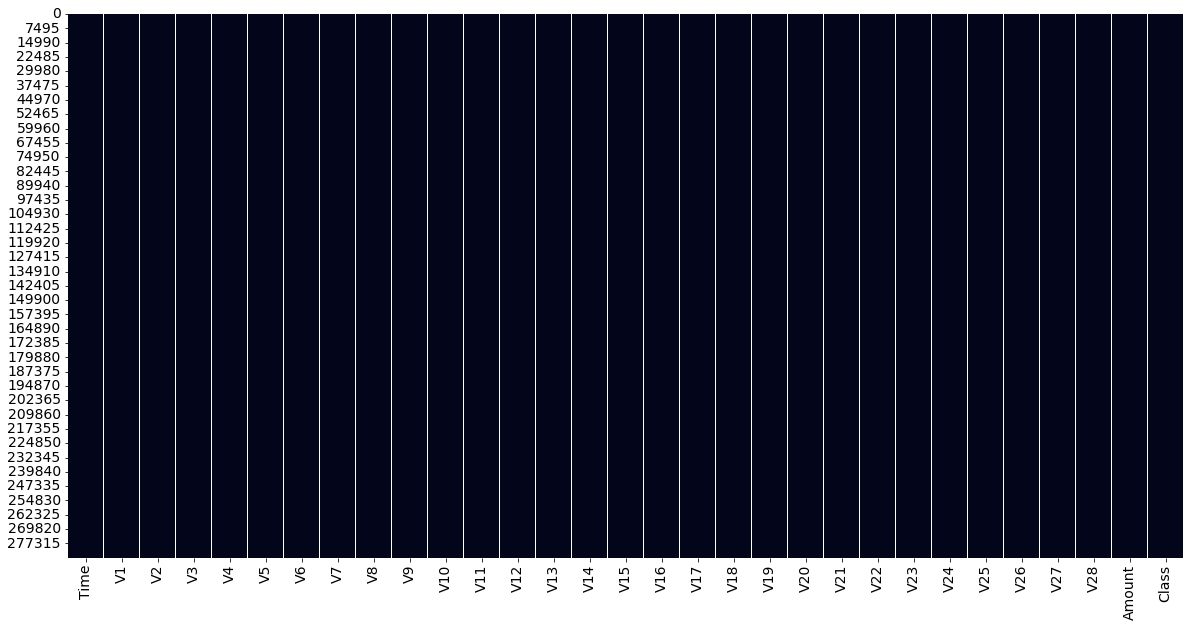

In [ ]:
plt.figure(figsize=(20,10))
#affichage des valeurs manquantes
sns.heatmap(data.isna(), cbar=False) 
#Pandas isna() function is used to detect missing values
data.info()

ON REMARQUE QU'IL N'EXISTE PAS DE VALEUR MANQUANTE DANS CETTE BASE DE DONNEES

Text(0, 0.5, 'Nb of transactions')

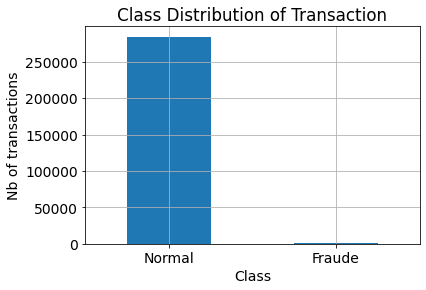

In [ ]:
# separation des transaction de la data pour analyse 
normal= data[data.Class == 0]
fraude= data[data.Class == 1]
LABELS = ["Normal", "Fraude"]
set_class = pd.value_counts(data['Class'] , sort = True)

set_class.plot(kind = 'bar' , rot=0 )

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Nb of transactions")

In [ ]:
#mesure statistique de la data
print("Le nb des transaction normale est : ",normal.shape)
print("Le nb des transaction frauduleuse est : ",fraude.shape)

Le nb des transaction normale est :  (284315, 31)
Le nb des transaction frauduleuse est :  (492, 31)


we notice that our data set is highly unbalanced (most of the
transactions are not fraudulent). So the algorithms are
much more likely to classify new observations as
majority class and high precision will not tell us anything

In [ ]:
data.groupby('Class').agg(
    transactions=('Class', 'count'),
    total_revenue=('Amount', 'sum'),
).round(2)

,transactions,total_revenue
Class,,
0,284315,25102462.04
1,492,60127.97


En regroupant par class colonne puis en créant un agg()nous pouvons calculer les coûts de la fraude. L'ensemble de données est basé sur une période de deux jours, au cours de laquelle 492 transactions frauduleuses ont potentiellement généré 60 127,97 £ de perte de revenus. En utilisant une extrapolation naïve, comme nous ne disposons pas de l'ensemble de données complet, cela équivaut à 30 063,98 £ par jour. Par conséquent, nous envisageons des coûts de fraude annuels d'environ 10 973 354 £.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcf1feae50>,
      dtype=object)

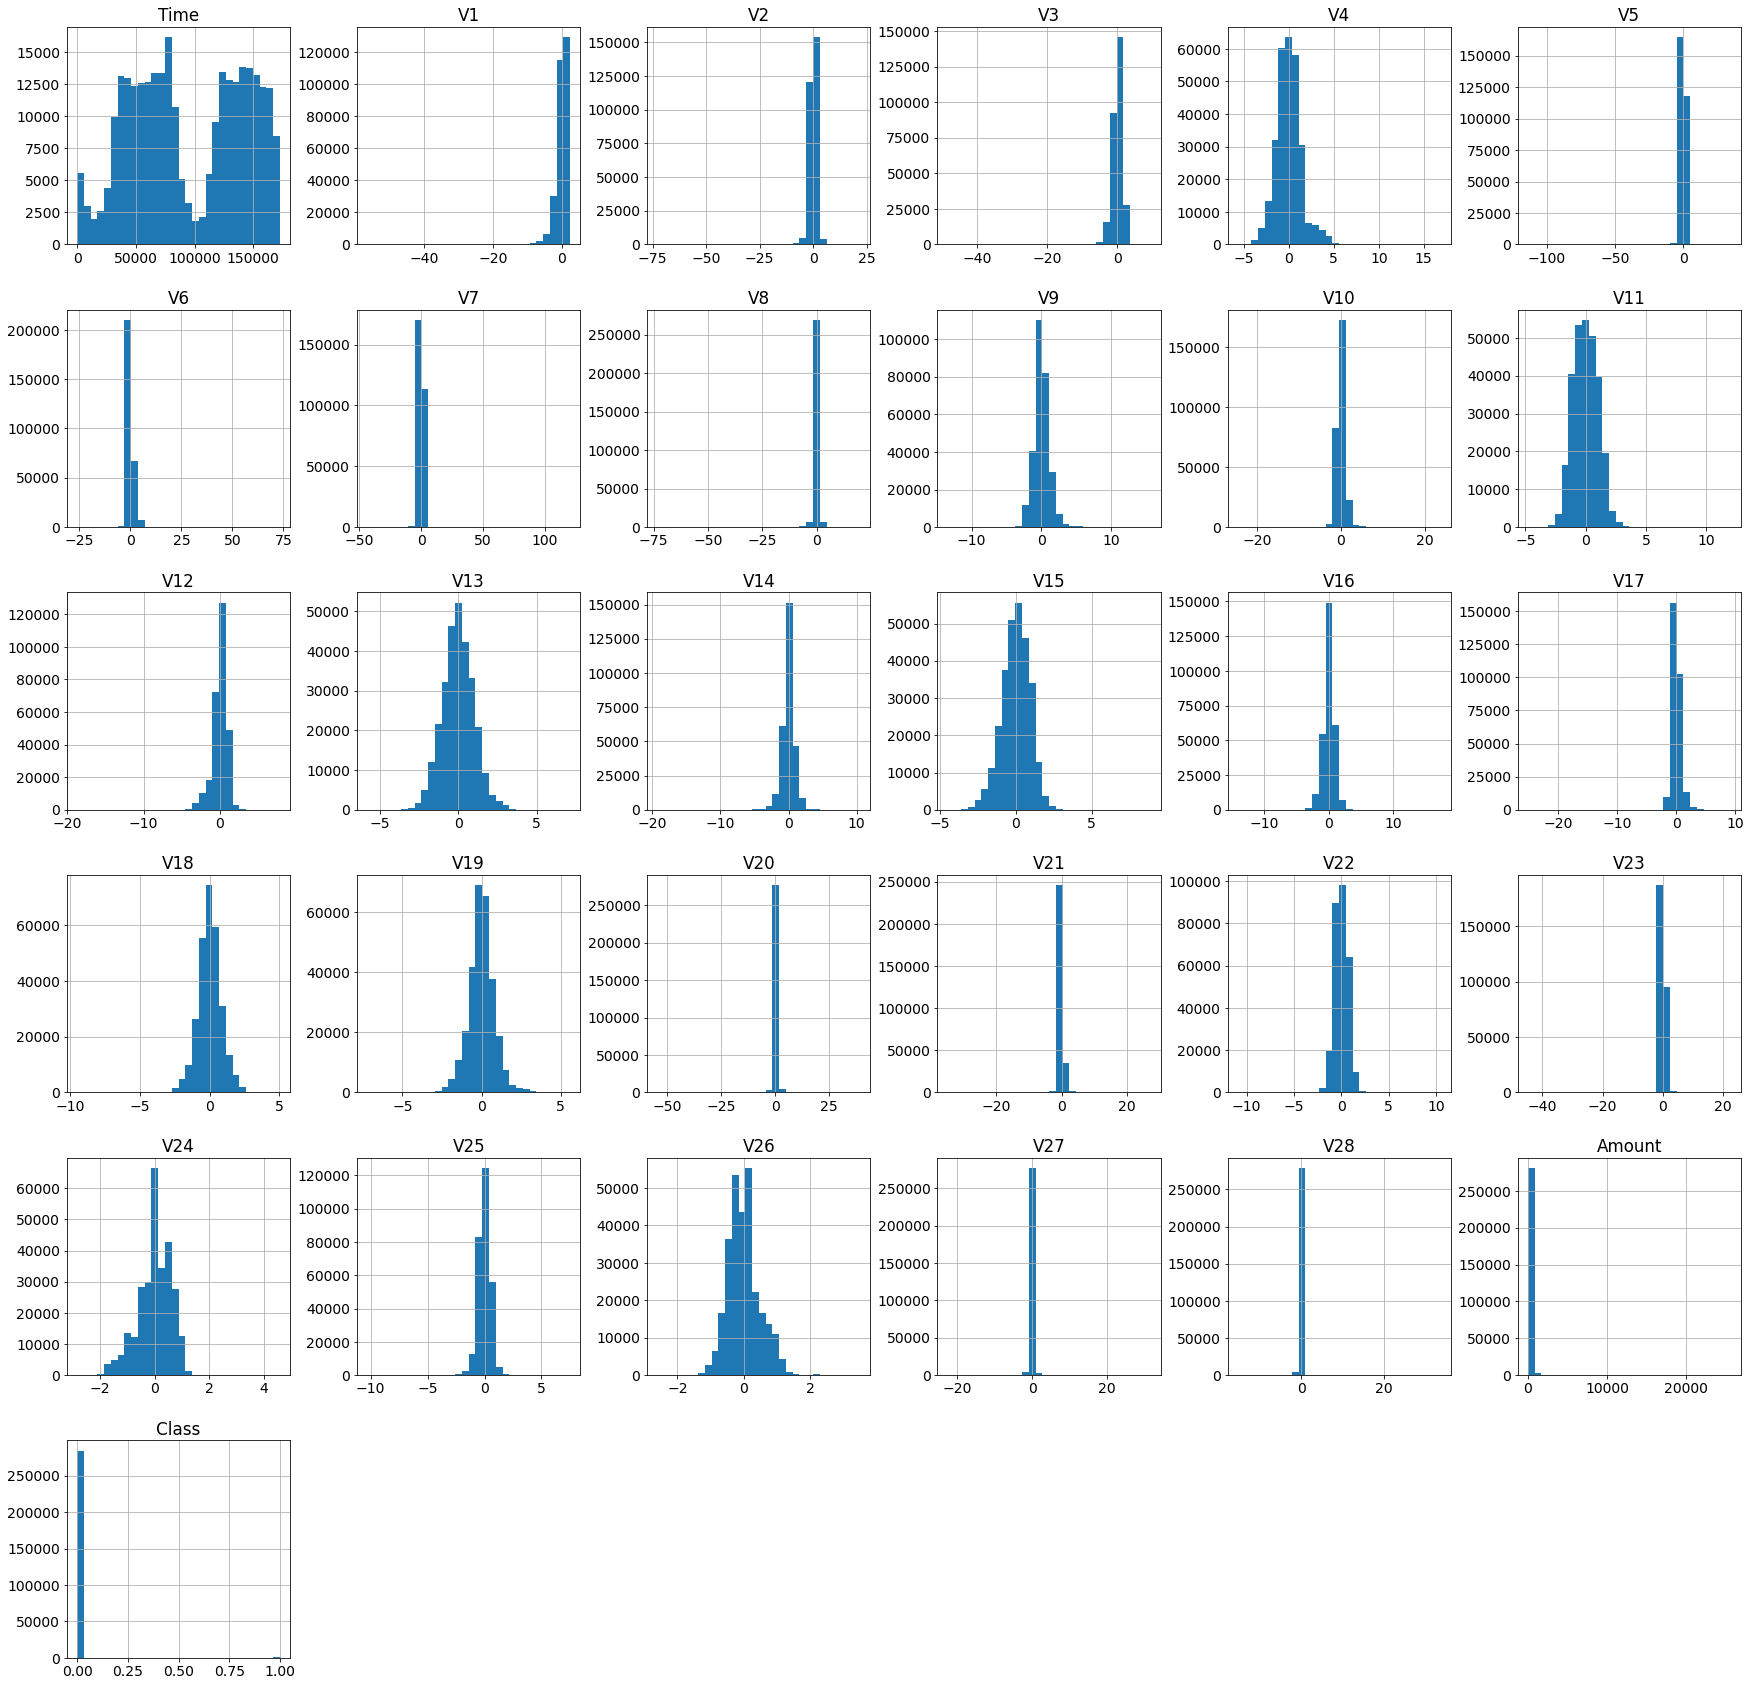

In [ ]:
#Distributions de chaque attributs dans la base de donnees
data.hist(bins=30, figsize=(30, 30))

In [ ]:
data1=data.copy()

In [ ]:
# mesures statistiques du montant de transaction des donnees normal
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

After the description of the variable Amount, we notice that the average
of this variable compared to normal transactions is 88.3.

In [ ]:
# mesures statistiques du montant de transaction des donnees frauduleux
fraude.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

On the other hand, its average in relation to fraudulent transactions is 122.2.
So it needs to be normalized.

In [ ]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Examine Correlation with Target Next, we'll quickly examine each column's Pearson correlation coefficients against the target class. Although we don't know what the features correspond to, because the bank has hidden these details from us so that we cannot exploit them to commit fraud ourselves, we can see that some of them have moderate correlations with fraudulent or non-fraudulent transactions both in the negative and in the positive sense. For example, v11 has the strongest positive correlation and v17 has the strongest negative correlation. There are certainly indicators here to guide our model.

The correlation of attributes : 


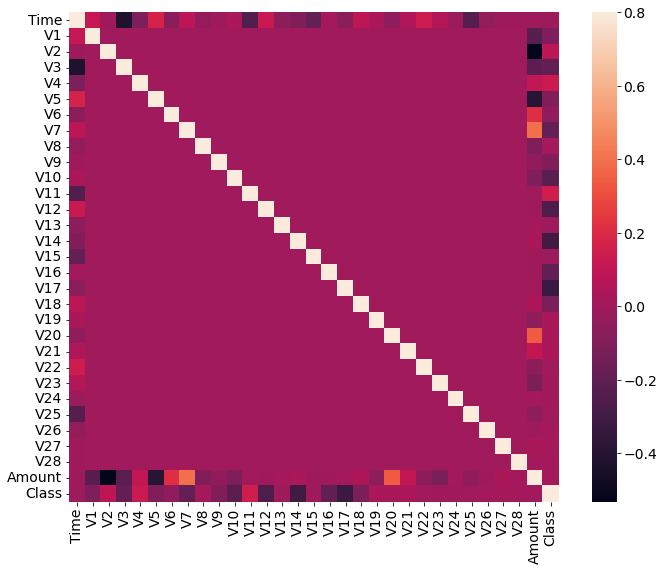

In [ ]:
print('The correlation of attributes : ')
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

The heat-map above indicates that there are no correlation values
high between the predictor columns. No predictor column has
no longer a high correlation value with the column
Class. However, there is a negative correlation between V2 and Amount
as well as a positive correlation between V7 and the Amount function because the base
data is partially pre-processed.

In [ ]:
data[data.columns[1:]].corr()['Class'][:].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

The values above indicate the correlation of the attributes with the variable
Target (the Class attribute) represented in a descending fashion.
We will examine the Pearson correlation coefficients of each
column relative to the 'class' target. Although we don't know what
match the features, because the bank hid these details from us
so that we cannot exploit them to commit ourselves
a fraud, we can see that some of them have
moderate correlations with fraudulent transactions or not
fraudulent both in the negative and in the positive sense. By
example, v11 has the strongest positive correlation and v17 has the correlation
strongest negative.

In [ ]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('le nombre Total des Transactions est {}'.format(Total_transactions), attrs = ['bold']))
print(cl('le nombre Total des Transactions normale  est {}'.format(normal), attrs = ['bold']))
print(cl('le nombre Total des Transactions frauduleux {}'.format(fraudulent), attrs = ['bold']))
print(cl('le pourcentage des Transactions frauduleuses est %  {}'.format(fraud_percentage), attrs = ['bold']))

le nombre Total des Transactions est 284807
le nombre Total des Transactions normale  est 284315
le nombre Total des Transactions frauduleux 492
le pourcentage des Transactions frauduleuses est %  0.17


In [ ]:
#Selon le nombre par colonne, nous n'avons pas de valeurs nulles. 
#De plus, la sélection de fonctionnalités n'est pas le cas pour ce cas d'utilisation.

#J'ai observé dans nos données 28 fonctionnalités sont des versions transformées
#de PCA mais le montant est celui d'origine. Et, tout en vérifiant que le minimum et le maximum sont dans le montant,
#j'ai trouvé que la différence est énorme et peut faire dévier notre résultat.
#Amount:le montant en $
min(data.Amount),max(data.Amount)


(0.0, 25691.16)

Maintenant, on va supprimer les valeurs doulantes à l’aide de la fonction drop duplicate():

In [ ]:
#Nous pouvons également vérifier les transactions en double.
#Avant de supprimer toute transaction en double, nous avons 284 807 transactions dans nos données.
#Supprimons le doublon et observons les changements
#Nous avions donc environ 9 000 transactions en double.

print('Le nombre de transaction avant : ',data1.shape)
data.drop_duplicates(inplace=True)
print('Le nombre de transaction aprés la suppression des données doublantes  : ',data.shape)
##à l'échelle, sans doublons, ni manquantes. Séparons-le maintenant pour notre modèle de construction.
#Exécutez la ligne de code ci-dessous pour supprimer les doublons.

print("Au debut on avait :(284807 lignes , 31 colonnes)\t"
"Apres suppression de doublon   (283726 lignes, 31 collonnes)")

Le nombre de transaction avant :  (283726, 31)
Le nombre de transaction aprés la suppression des données doublantes  :  (283726, 31)
Au debut on avait :(284807 lignes , 31 colonnes)	Apres suppression de doublon   (283726 lignes, 31 collonnes)


In [ ]:
#Normalisation du temps a l'aide du Min-Max
time=data['Time'] 
data['Time'] = (time - time.min()) / (time.max() - time.min())

In [ ]:
#on constate que les moyenne ne sont pas 
#Dans ce cas, il est recommandé de mettre à l'échelle cette variable.
#Nous pouvons utiliser un détartreur standard pour le réparer.
d=np.mean(data1.Amount)
print("Amount avant normalisation",d)

Amount avant normalisation 88.47268731099724


In [ ]:
#on va normaliser amount parcequelle nest pas dans lechelle
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
d1=np.mean(data.Amount)
print("Amount apres normalisation",d1)

Amount apres normalisation -5.409346726214081e-17


In [ ]:
#Diviser les données
X = data.drop('Class', axis = 1).values
#(feature)
y = data['Class'].values 
#target

In [ ]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  2.44199512e-01],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02, -3.42583991e-01],
       [ 5.78730497e-06, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  1.15889967e+00],
       ...,
       [ 9.99976851e-01,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02, -8.22394964e-02],
       [ 9.99976851e-01, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01, -3.13390583e-01],
       [ 1.00000000e+00, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  5.13290048e-01]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

In [ ]:
print("\t \nla taille xtrain.shape ::\n\t ", X_train.shape)
print("\t\nla taille xtest.shape ::\n\t ", X_test.shape)
print("\t\nla taille ytrain.shape ::\n\t ", y_train.shape)
print("\t\n la talle ytest.shape  :: \n\t", y_test.shape)

	 
la taille xtrain.shape ::
	  (198608, 30)
	
la taille xtest.shape ::
	  (85118, 30)
	
la taille ytrain.shape ::
	  (198608,)
	
 la talle ytest.shape  :: 
	 (85118,)


In [ ]:
print("Training Set before Standardised : \n", X_train[0])
print("Testing Set before Standardised : \n", X_test[0])

Training Set before Standardised : 
 [ 9.19735867e-01  1.75111041e+00 -1.21763415e+00 -1.24800643e+00
 -3.75732714e-01 -1.02757874e+00 -1.03620492e+00 -5.43210780e-01
 -2.86739337e-01 -1.13453561e-01 -3.96924584e-02 -1.52973759e-01
 -2.06625541e-01  1.22267681e+00 -2.26280206e+00  2.42902627e-01
  1.63865856e+00  1.32809641e+00 -5.40564345e-01  1.26334367e-01
  5.02680894e-01  3.73010169e-01  7.65897175e-01 -8.34513043e-02
 -1.36527554e-02 -1.90530299e-01 -1.15266626e-01 -2.14503515e-03
  2.58864873e-02  5.21277301e-01]
Testing Set before Standardised : 
 [ 0.3715334   1.32511085 -0.14842223  0.20203755 -0.93937004 -0.37929467
 -0.51970085 -0.16100928 -0.19293828  1.38656803 -1.09976983 -0.88140822
  1.3725118   1.777297   -0.37094452  0.92870145 -0.52966731 -0.43926489
  0.08351325  0.9528429   0.01094317 -0.03809718  0.22752203 -0.22815691
 -0.38513151  0.84571636 -0.5796724   0.08211385  0.0220622  -0.33335871]


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("Training Set after Standardised : \n", X_train[0])
print("Test Set after Standardised : \n", X_test[0])

Training Set after Standardised : 
 [ 1.35194741  0.89774594 -0.73654461 -0.82932986 -0.26536678 -0.74399701
 -0.7756905  -0.43752817 -0.23886043 -0.10281694 -0.03565876 -0.151491
 -0.20420828  1.22649915 -2.36568798  0.26454292  1.87565067  1.56966923
 -0.6464629   0.15506639  0.6469193   0.50733044  1.05507604 -0.1353665
 -0.02248222 -0.36797317 -0.23746296 -0.00998672  0.07862379  0.51583762]
Test Set after Standardised : 
 [-0.64111336  0.67873805 -0.08796812  0.13154877 -0.66367701 -0.27608446
 -0.38886142 -0.13006002 -0.16024597  1.26316296 -1.01358469 -0.86553226
  1.37481106  1.78375936 -0.38827051  1.01372438 -0.60732686 -0.51950238
  0.09876372  1.1726351   0.01247367 -0.05285788  0.31373422 -0.36794519
 -0.63454469  1.6235772  -1.20063581  0.20036599  0.06682702 -0.33007411]


# **Implementation of Algorithms**

# Decision Tree

In [ ]:
#Applying Algorithms
DT = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')
#training
DT.fit(X_train, y_train)
#testing
dt_yhat = DT.predict(X_test)
DT.score(X_test,y_test) 

0.9994008317864611

In [ ]:
Accuracy_DT = format(accuracy_score(y_test, dt_yhat) * 100)
print('Accuracy score of decision tree model is ', Accuracy_DT )
F1Score_DT= format(f1_score(y_test, dt_yhat) * 100)
print('F1 score of the Decision Tree model is ', F1Score_DT)
Precision_DT = format(precision_score(y_test, dt_yhat) * 100)
print('precision_score of decision Tree model is ', Precision_DT )
recall_DT = format(recall_score(y_test, dt_yhat) * 100)
print('recall score of decision Tree model is ', recall_DT )
AUC_DT = format(roc_auc_score(y_test, dt_yhat) * 100)
print('roc_auc_score of decision Tree model is ', AUC_DT )
tn, fp, fn, tp=confusion_matrix(y_test, dt_yhat).ravel()

print("True Positive",tp)
print("False positive",fp)
print("True negative",tn)
print("False negative",fn)
# Fall out or false positive rate
FPR = fp/(fp+tn)
print("False positive  Rate",round(FPR * 100,4))
# False negative rate
FNR = fn/(tp+fn)
print("false negative Rate",round(FNR * 100,4))
correct=tp+tn
incorrect=fp+fn
print("correct",correct)
print("incorrect",incorrect)

Accuracy score of decision tree model is  99.9400831786461
F1 score of the Decision Tree model is  80.45977011494253
precision_score of decision Tree model is  88.23529411764706
recall score of decision Tree model is  73.94366197183099
roc_auc_score of decision Tree model is  86.96359336588161
True Positive 105
False positive 14
True negative 84962
False negative 37
False positive  Rate 0.0165
false negative Rate 26.0563
correct 85067
incorrect 51


Text(0.5, 1.0, 'Precision-Recall curve: ~0.0002')

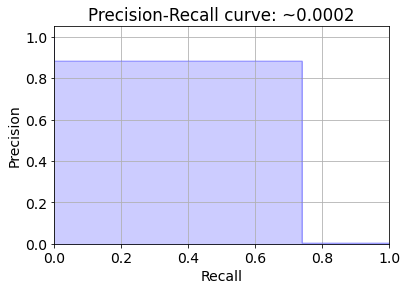

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, dt_yhat)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: ~{0:0.4f}'.format(FPR))

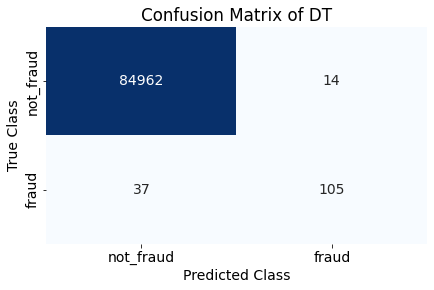

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix1 = confusion_matrix(y_test, dt_yhat)


# Create pandas dataframe
dataframe = pd.DataFrame(matrix1, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix of DT"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

plt.show()

# KNN

In [ ]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)
KNN.score(X_test,y_test)

0.9994830705608685

In [ ]:
Accuracy_KNN = format(accuracy_score(y_test, knn_yhat))
print('Accuracy score of the K-Nearest Neighbors model is {}', Accuracy_KNN)
F1Score_KNN = format(f1_score(y_test, knn_yhat))
print('F1 score of the K-Nearest Neighbors model is {}', F1Score_KNN )
precision_KNN = format(precision_score(y_test, knn_yhat))
print('precision_score of KNN model is {}',precision_KNN )
recall_KNN = format(recall_score(y_test, knn_yhat))
print('recall score of knn model is {}',recall_KNN )
AUC_KNN = format(roc_auc_score(y_test, knn_yhat))
print('roc_auc_score of knn model is {}' , AUC_KNN )
tn, fp, fn, tp=confusion_matrix(y_test,  knn_yhat).ravel()
print("True Positive",tp)
print("False positive",fp)
print("True negative",tn)
print("False negative",fn)
# Fall out or false positive rate
FPR = fp/(fp+tn)
print("False positive  Rate",round(FPR * 100,4))
# False negative rate
FNR = fn/(tp+fn)
print("false negative Rate",round(FNR * 100,4))
correct=tp+tn
incorrect=fp+fn
print("correct",correct)
print("incorrect",incorrect)

In [ ]:
matrix2= confusion_matrix(y_test, knn_yhat)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix2, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

plt.show()

# SVM

In [ ]:
#Support Vector Machines

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
svm.score(X_test,y_test)

In [ ]:
Accuracy_SVM = format(accuracy_score(y_test, svm_yhat))
print('Accuracy score of the Support Vector Machines model is ', Accuracy_SVM)
F1Score_SVM = format(f1_score(y_test, svm_yhat))
print('F1 score of the Support Vector Machines model is ', F1Score_SVM )
precision_SVM= format(precision_score(y_test, svm_yhat))
print('precision_score of svm model is ', precision_SVM )
recall_SVM = format(recall_score(y_test, svm_yhat))
print('recall score of svm model is ', recall_SVM )
AUC_SVM = format(roc_auc_score(y_test, svm_yhat))
print('roc_auc_score of svm model is ', AUC_SVM )
tn, fp, fn, tp=confusion_matrix(y_test,  svm_yhat).ravel()
print("True Positive",tp)
print("False positive",fp)
print("True negative",tn)
print("False negative",fn)
# Fall out or false positive rate
FPR = fp/(fp+tn)
print("False positive  Rate",round(FPR * 100,4))
# False negative rate
FNR = fn/(tp+fn)
print("false negative Rate",round(FNR * 100,4))
correct=tp+tn
incorrect=fp+fn
print("correct",correct)
print("incorrect",incorrect)

In [ ]:
matrix3= confusion_matrix(y_test, svm_yhat)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix3, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix of svm "), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

plt.show()